In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
dataset=pd.read_csv(r'C:\Users\Suresh\Downloads\Python_Diwali_Sales_Analysis-main\Diwali_Sales_Data.csv',encoding='unicode_escape')

In [39]:
dataset.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [33]:
(dataset.isnull().sum()/dataset.shape[0])*100

User_ID               0.000000
Cust_name             0.000000
Product_ID            0.000000
Gender                0.000000
Age Group             0.000000
Age                   0.000000
Marital_Status        0.000000
State                 0.000000
Zone                  0.000000
Occupation            0.000000
Product_Category      0.000000
Orders                0.000000
Amount                0.106657
Status              100.000000
unnamed1            100.000000
dtype: float64

In [35]:
dataset.drop(['Status','unnamed1'],axis=1,inplace=True)

In [37]:
dataset.dropna(inplace=True)

# Gender shopping

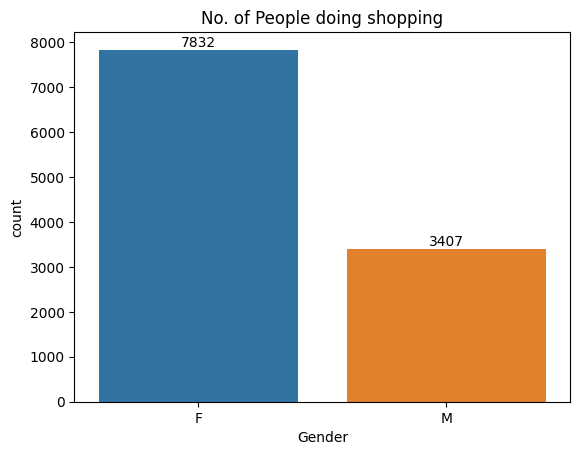

In [43]:
ax=sns.countplot(x='Gender',data=dataset,hue='Gender')
for x in ax.containers:
    ax.bar_label(x)
ax.set_title('No. of People doing shopping')
plt.show()

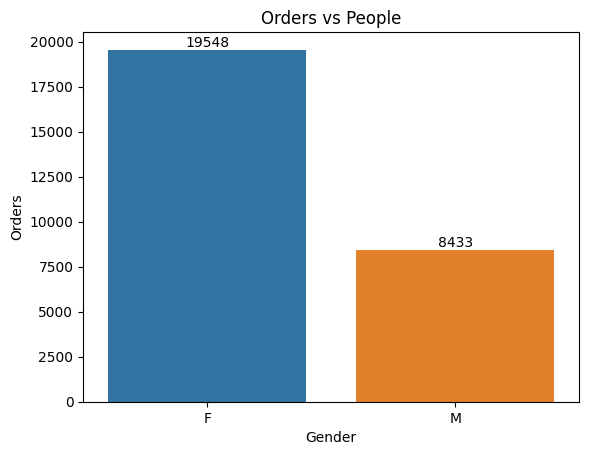

In [45]:
orders=dataset.groupby(by=['Gender'])['Orders'].sum().reset_index()
ax=sns.barplot(x='Gender',y='Orders',data=orders,hue='Gender')
for x in ax.containers:
    ax.bar_label(x)
ax.set_title('Orders vs People')
plt.show()

In [47]:
dataset['Amount']=dataset['Amount'].astype('int64')

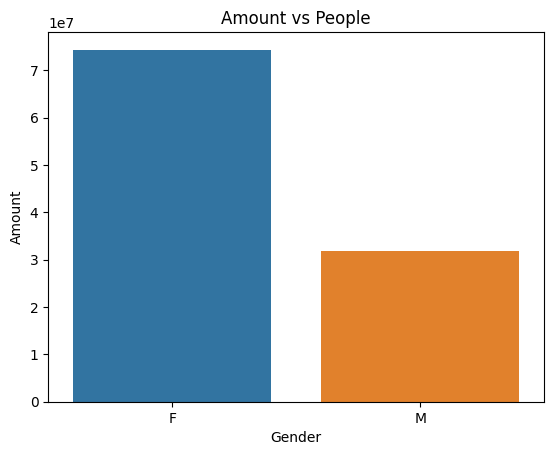

In [49]:
sales=dataset.groupby(by=['Gender'])['Amount'].sum().reset_index()
ax=sns.barplot(x='Gender',y='Amount',data=sales,hue='Gender')
ax.set_title('Amount vs People')
plt.show()

#Conclusions:From above graphs its shows that most of the buyers are Female

# Age

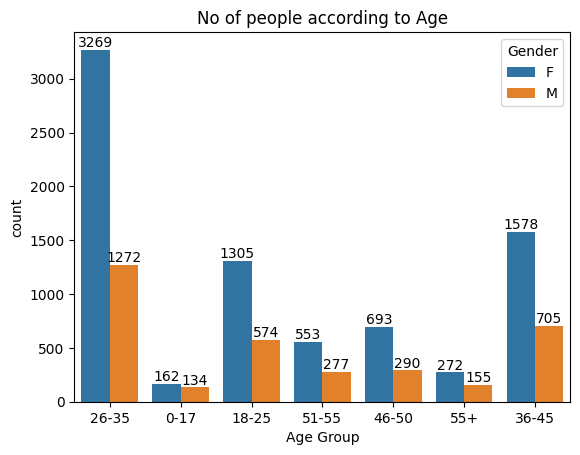

In [51]:
ax=sns.countplot(x='Age Group',data=dataset,hue='Gender')
for x in ax.containers:
    ax.bar_label(x)
ax.set_title('No of people according to Age')
plt.show()

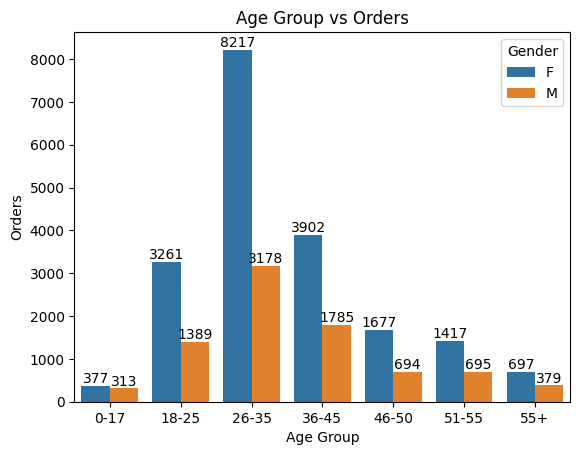

In [53]:
Order_Sale=dataset.groupby(by=['Gender','Age Group'])['Orders'].sum().reset_index()
ax=sns.barplot(x='Age Group',y='Orders',data=Order_Sale,hue='Gender')
for x in ax.containers:
    ax.bar_label(x)
ax.set_title('Age Group vs Orders')
plt.show()

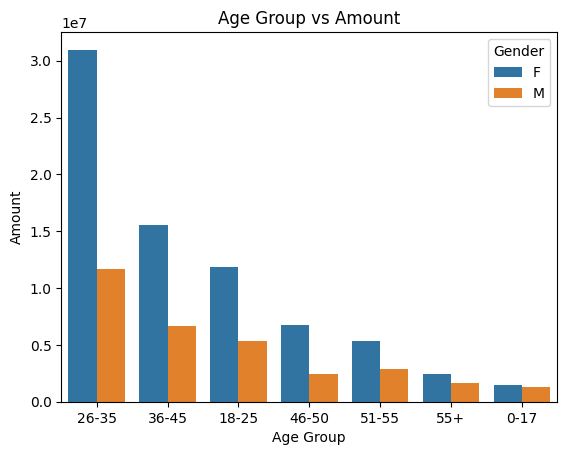

In [55]:
Age_Sales=dataset.groupby(by=['Gender','Age Group'])['Amount'].sum().sort_values(ascending=False).reset_index()
ax=sns.barplot(x='Age Group',y='Amount',data=Age_Sales,hue='Gender')
ax.set_title('Age Group vs Amount')
plt.show()

#Conclusion:Most of the buyers are female of age_group 26-35 yrs

# State

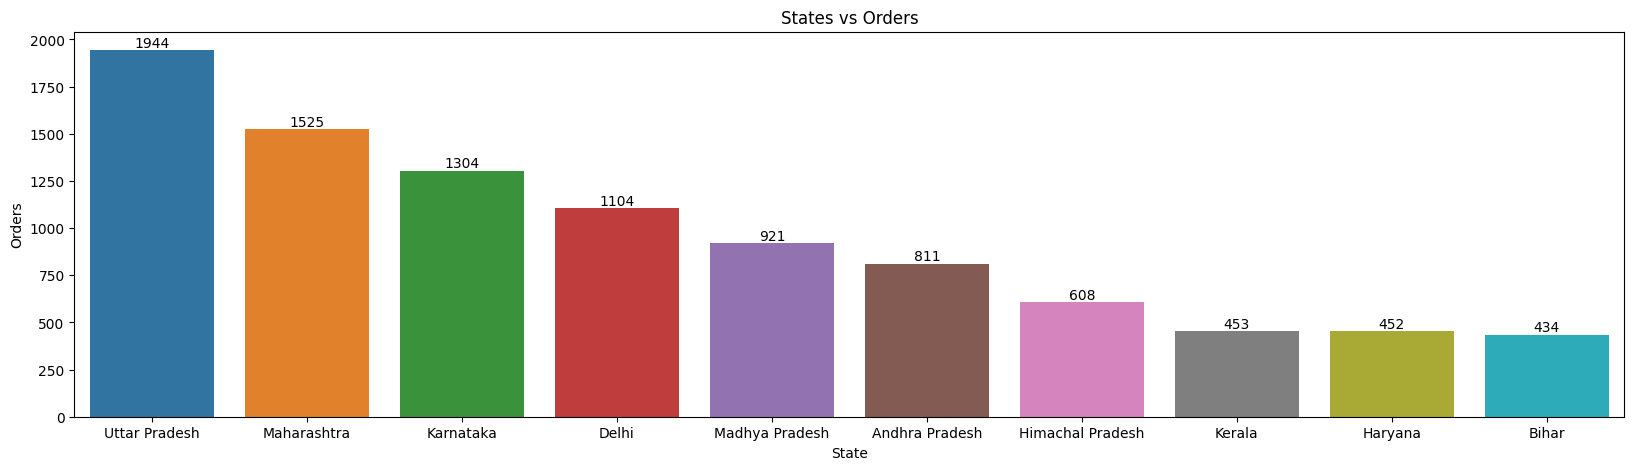

In [68]:
fig=plt.figure(figsize=(20,5))
State_sales=dataset.groupby(by=['State']).count().sort_values(by='Orders',ascending=False).reset_index().head(10)
ax=sns.barplot(x='State',y='Orders',data=State_sales,hue='State')
for x in ax.containers:
    ax.bar_label(x)
ax.set_title('States vs Orders')
plt.show()

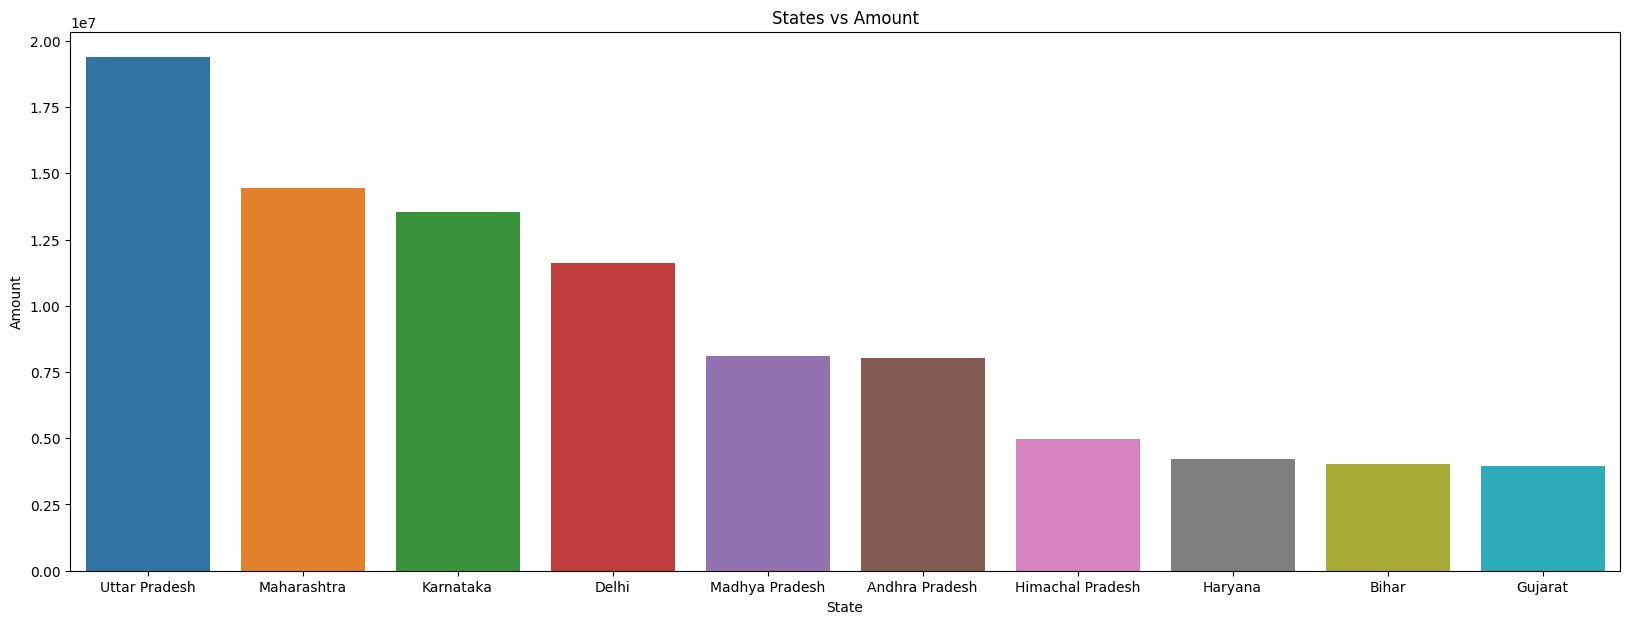

In [70]:
fig=plt.figure(figsize=(20,7))
State_orders=dataset.groupby(by=['State']).sum().sort_values(by='Amount',ascending=False).reset_index().head(10)
ax=sns.barplot(x='State',y='Amount',data=State_orders,hue='State')
ax.set_title('States vs Amount')
plt.show()

#Conclusion:Most of the Orders are from UP,Maharastra and Karnataka.These states spend most of the money

# Marrital Status

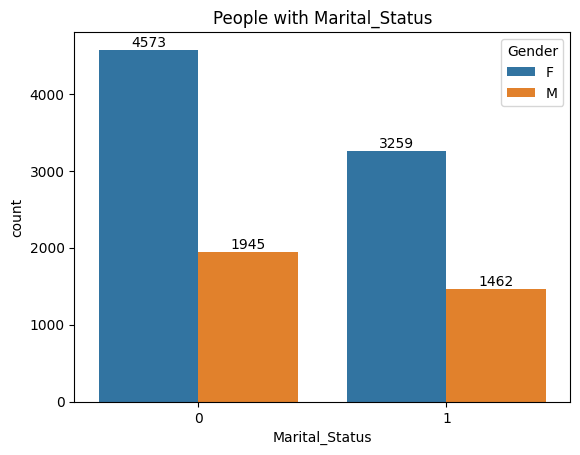

In [73]:
ax=sns.countplot(x='Marital_Status',data=dataset,hue='Gender')
for x in ax.containers:
    ax.bar_label(x)
ax.set_title('People with Marital_Status')    
plt.show()

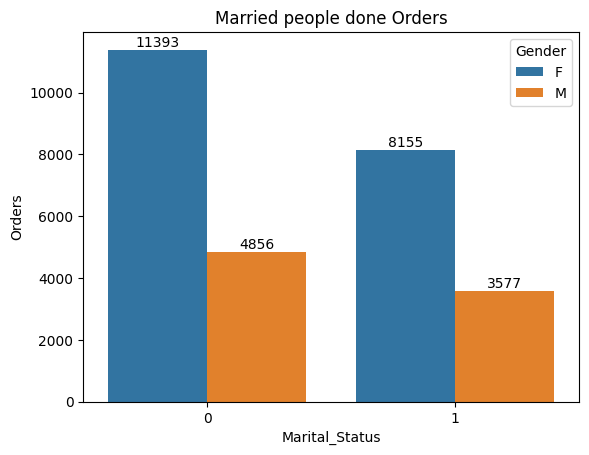

In [75]:
Married_sales=dataset.groupby(by=['Marital_Status','Gender'])['Orders'].sum().sort_values(ascending=False).reset_index()
ax=sns.barplot(x='Marital_Status',y='Orders',data=Married_sales,hue='Gender')
for x in ax.containers:
    ax.bar_label(x)
ax.set_title('Married people done Orders')
plt.show()

#Conclusions:In the above graphs most of the buyers are married women and they have high purchasing power

# Occupation

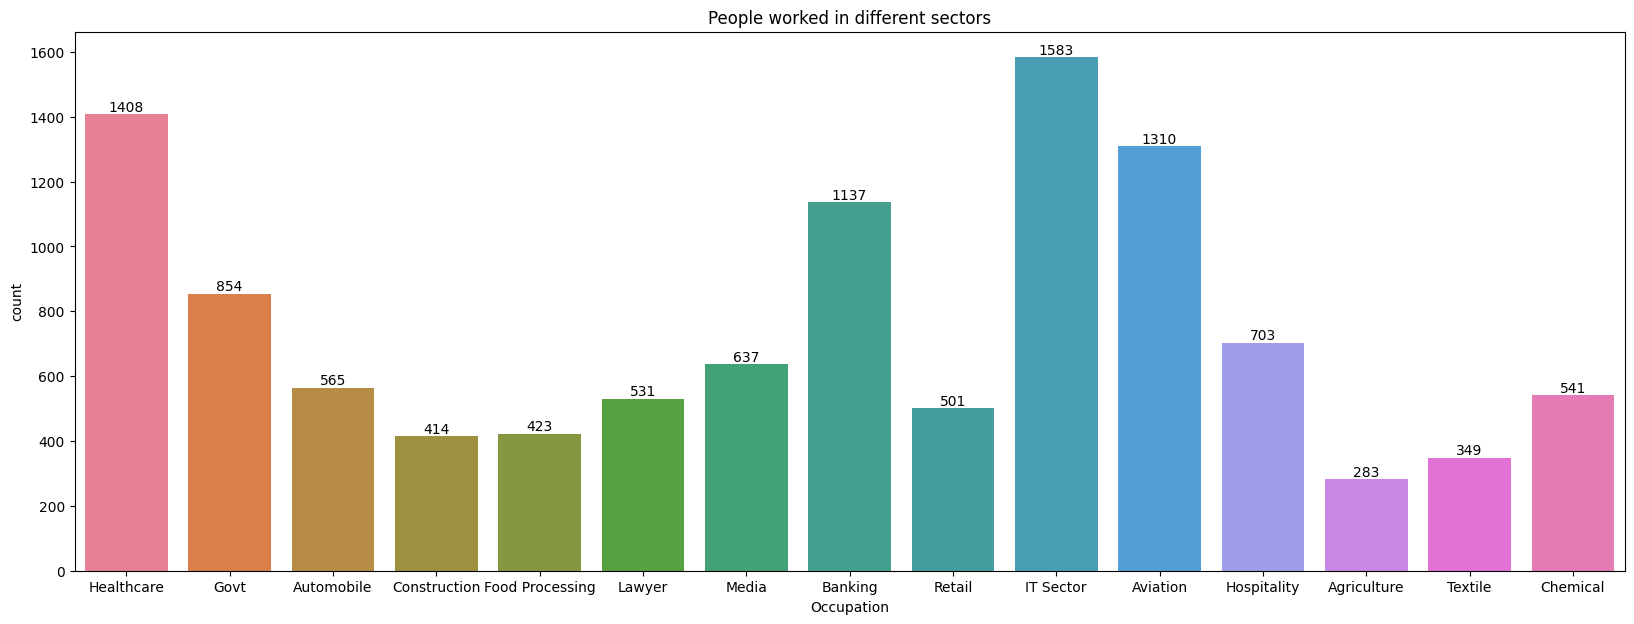

In [78]:
fig=plt.figure(figsize=(20,7))
ax=sns.countplot(x='Occupation',data=dataset,hue='Occupation')
for x in ax.containers:
    ax.bar_label(x)
ax.set_title('People worked in different sectors')
plt.show()

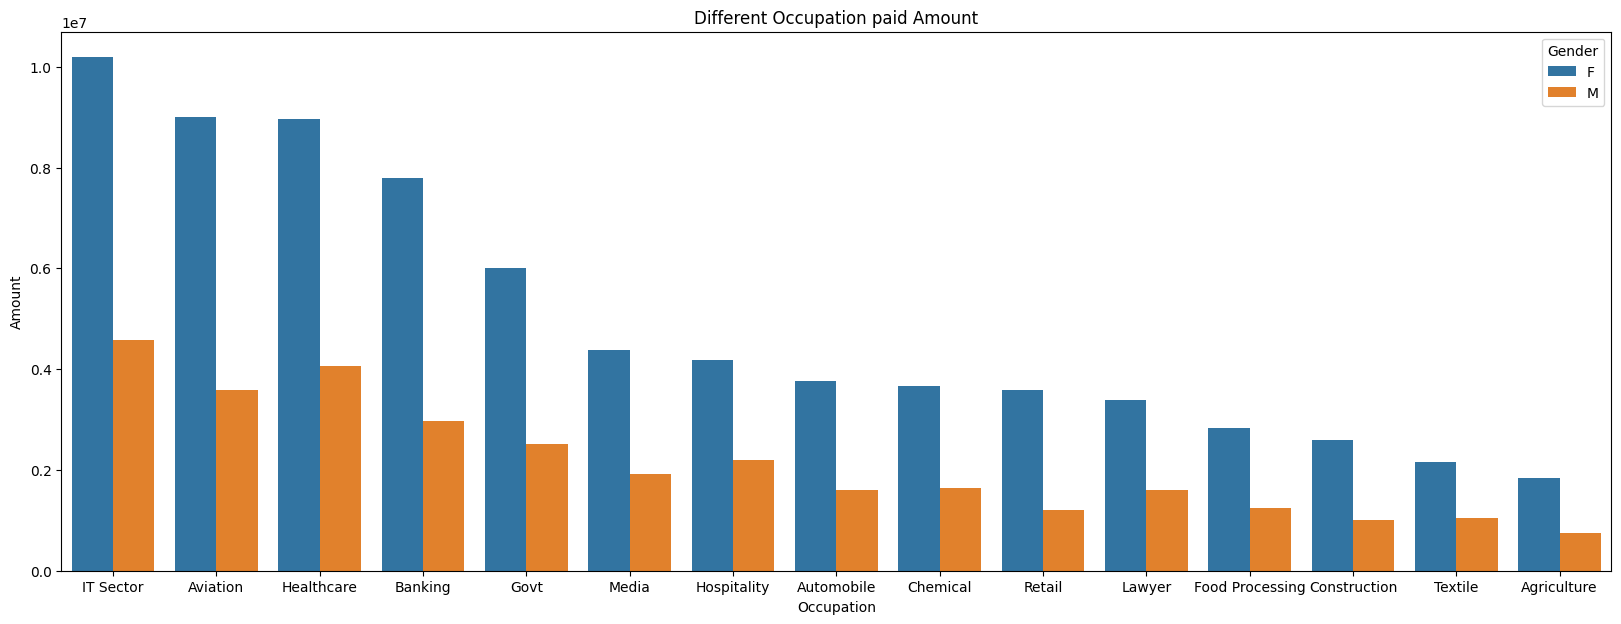

In [150]:
fig=plt.figure(figsize=(20,7))
Age_group=dataset.groupby(by=['Occupation','Gender'])['Amount'].sum().sort_values(ascending=False).reset_index()
ax=sns.barplot(x='Occupation',y='Amount',data=Age_group,hue='Gender')
ax.set_title('Different Occupation paid Amount')
plt.show()

#Conclusion:Most female working in IT Sector,Aviation and Healthcare

# Product

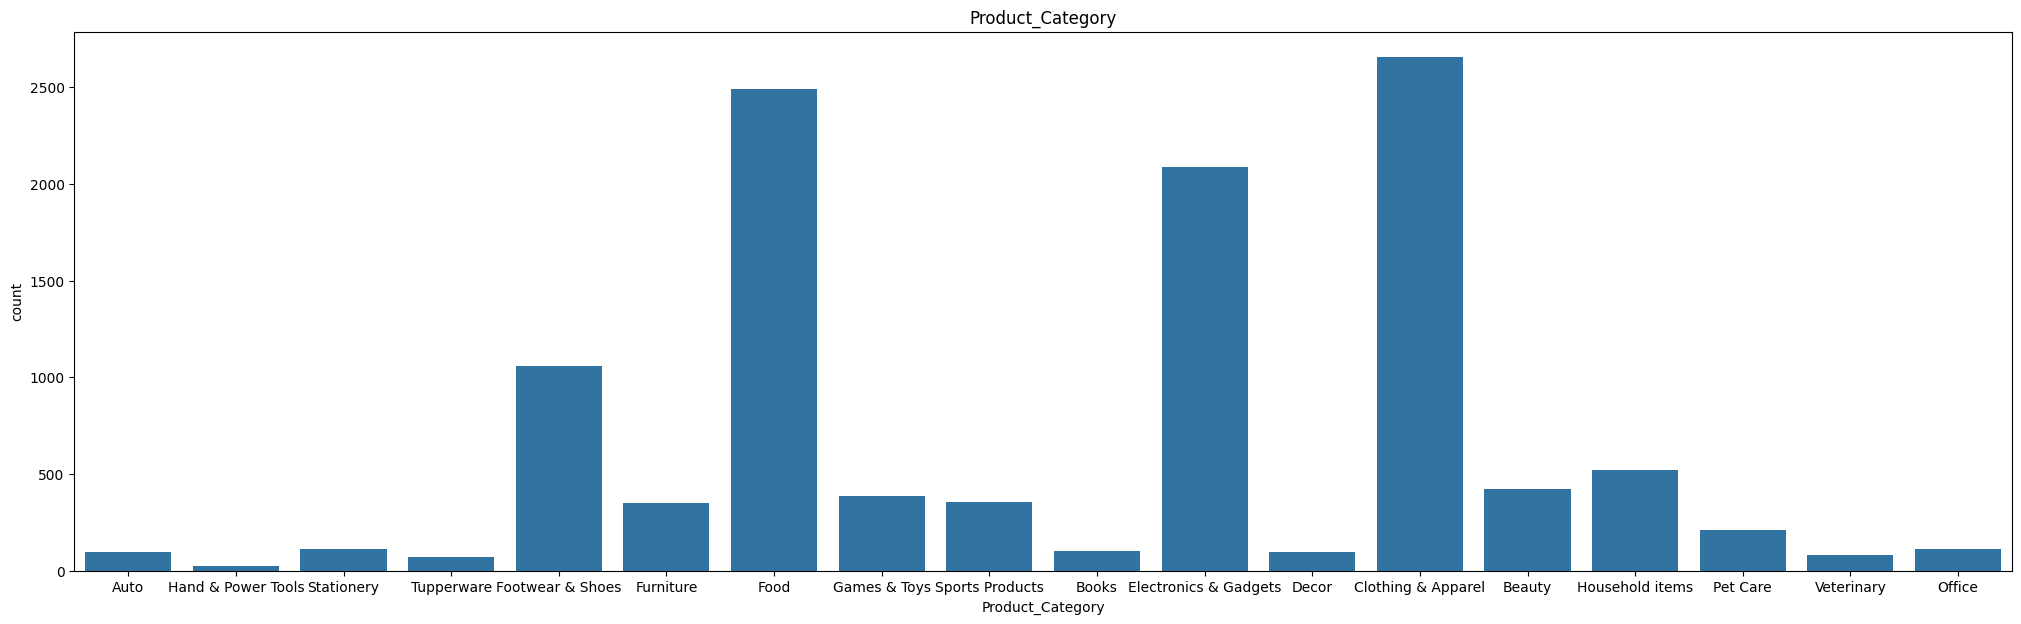

In [89]:
fig=plt.figure(figsize=(25,7))
ax=sns.countplot(x='Product_Category',data=dataset)
ax.set_title('Product_Category')
plt.show()

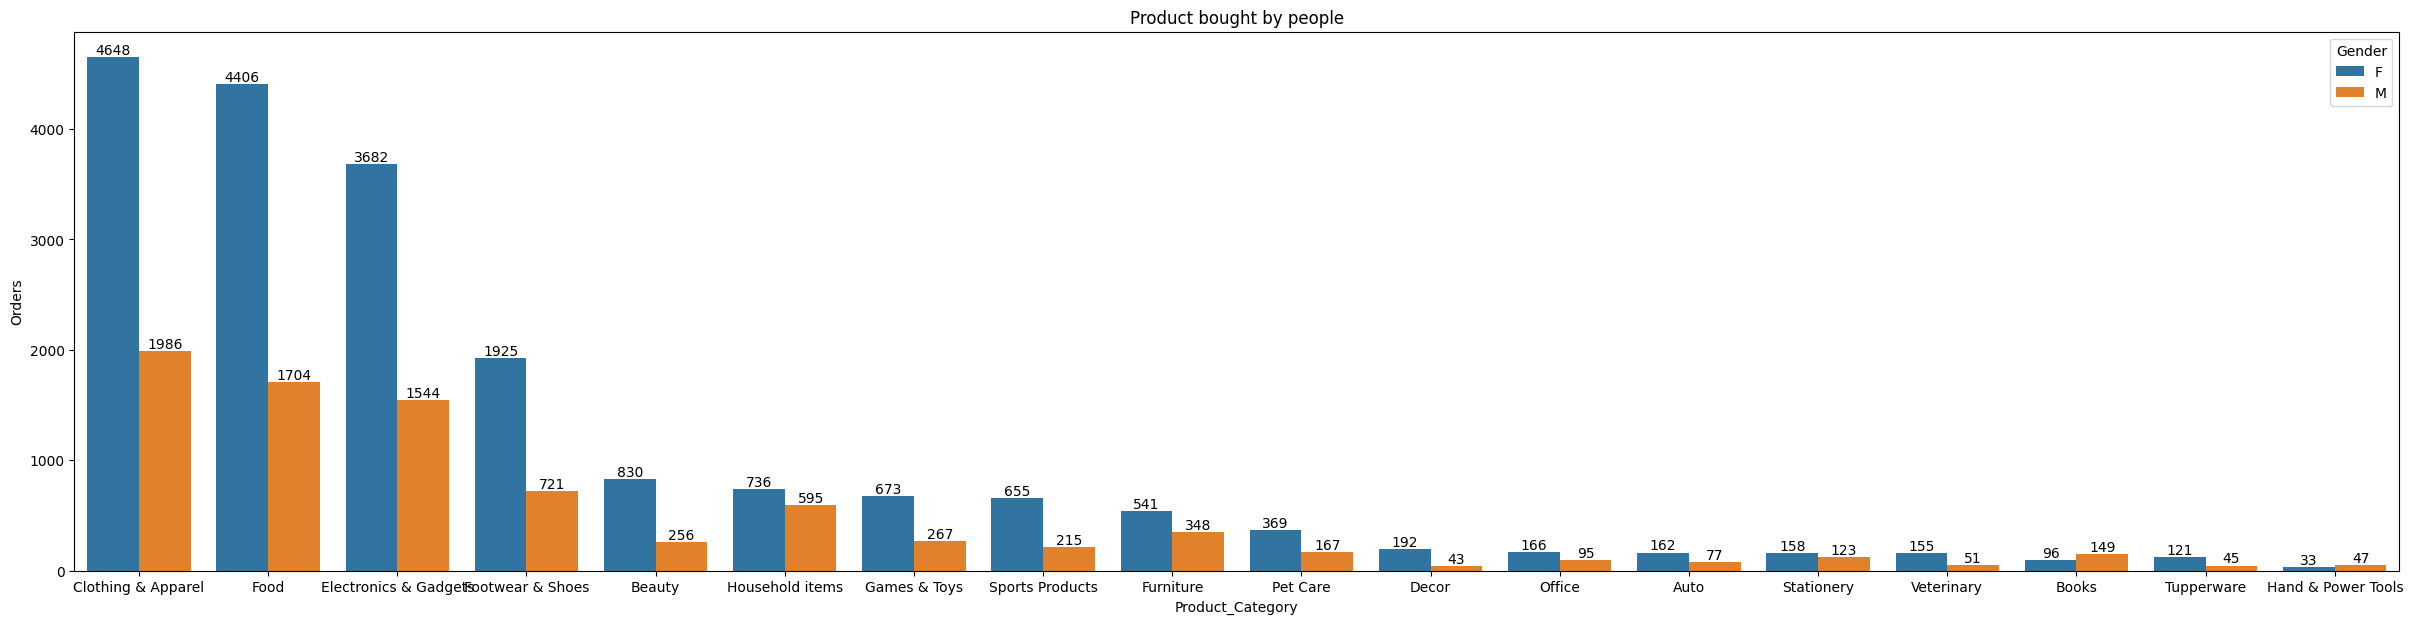

In [158]:
fig=plt.figure(figsize=(30,7))
sales_people=dataset.groupby(by=['Product_Category','Gender'])['Orders'].sum().sort_values(ascending=False).reset_index()
ax=sns.barplot(x='Product_Category',y='Orders',data=sales_people,hue='Gender')
for x in ax.containers:
    ax.bar_label(x)
ax.set_title('Product bought by people')
plt.show()

#Conclusion:In Clothing & Apparel,Food,Electronics & Gadgets female buy more than mens

# Conclusions:

In [ ]:
Married Women age group 26-35 yrs from UP,Maharastra and Karnataka working in IT,Aviation and Hea